In [151]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [152]:
train_df = pd.read_csv('/Users/omid/Desktop/KG/Rainfall/files/train.csv')
test_df = pd.read_csv('/Users/omid/Desktop/KG/Rainfall/files/test.csv')

In [153]:
train_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [155]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [156]:
test_df['winddirection'] = test_df['winddirection'].fillna(test_df['winddirection'].mean())

In [157]:
combine = [train_df, test_df]

In [158]:
test_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [159]:
test_id = test_df['id']

In [160]:
test_id.head()

0    2190
1    2191
2    2192
3    2193
4    2194
Name: id, dtype: int64

In [161]:
for dataset in combine:
    dataset.drop(['id', 'day'], axis=1, inplace=True)

In [162]:
train_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


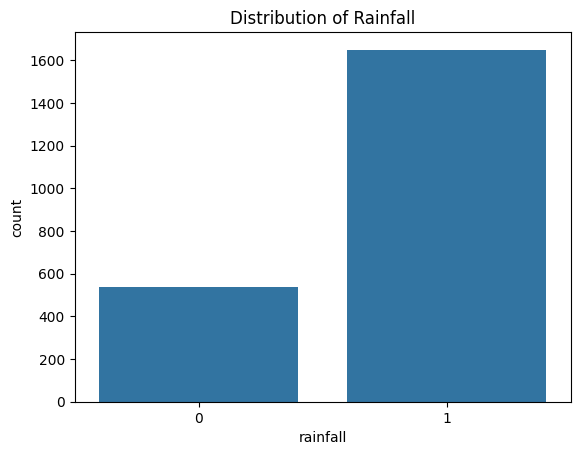

In [163]:
sns.countplot(x=train_df['rainfall'])
plt.title('Distribution of Rainfall')
plt.show()

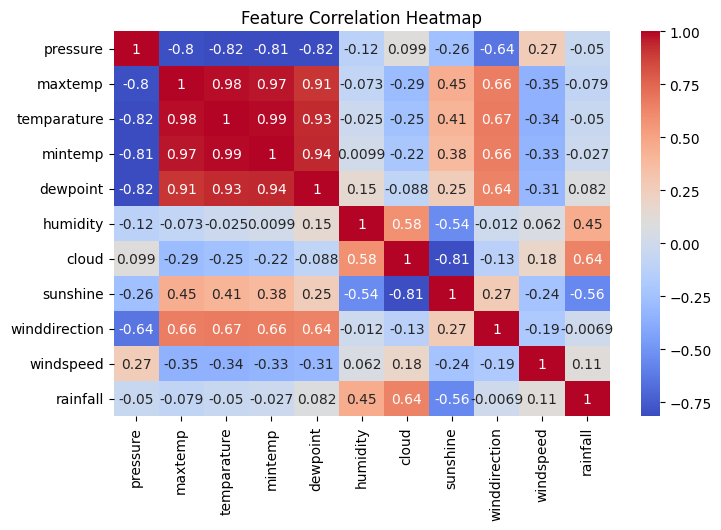

In [164]:
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [165]:
for dataset in combine:
    dataset.drop(['winddirection'], axis=1, inplace=True)

In [166]:
for dataset in combine:
    dataset['humidity_cloud'] = dataset['humidity'] * dataset['cloud']
    dataset['sunshine_ratio'] = dataset['sunshine'] / (dataset['cloud'] + 1)  # +1 baraye ke 0 nashe
    dataset['temp_diff'] = dataset['maxtemp'] - dataset['mintemp']

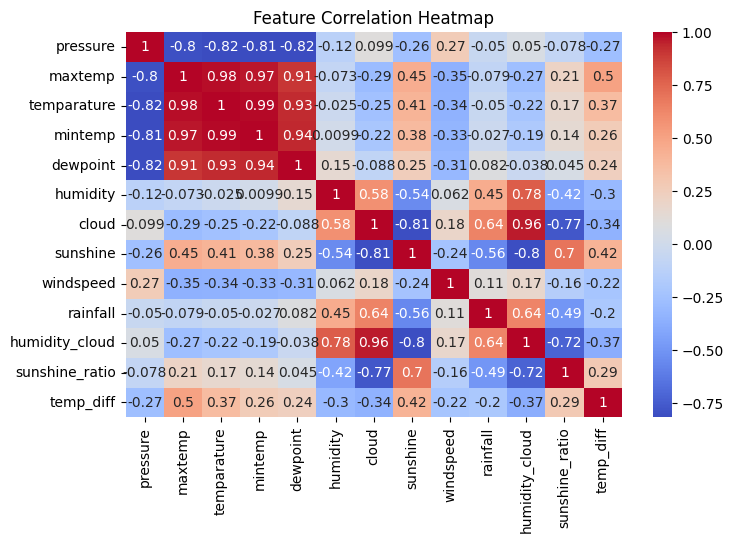

In [167]:
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [168]:
scaler = StandardScaler()
columns_to_scale = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud', 
                    'sunshine', 'windspeed', 'humidity_cloud', 'sunshine_ratio', 'temp_diff']
for dataset in combine:
    dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [169]:
X = train_df.drop(columns=['rainfall'])
Y = train_df['rainfall']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [171]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.8470


In [172]:
Y_pred = rf_model.predict(test_df)

In [173]:
test_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed,humidity_cloud,sunshine_ratio,temp_diff
0,1.089945,-1.565186,-1.547695,-1.821155,14.9,1.706070,1.263248,-1.007591,0.182525,1.711802,-0.206968,0.334189
1,0.544699,-1.565186,-1.414980,-1.221217,15.1,1.834056,1.263248,-1.007591,1.288280,1.766386,-0.206968,-1.592121
2,1.889640,-2.676564,-2.571492,-2.459799,8.9,0.426211,1.095855,-1.007591,-0.561346,1.023712,-0.206968,-1.529982
3,1.707891,-1.018317,-1.263307,-1.337334,9.5,-0.981635,-1.749836,0.944687,2.826284,-1.667447,0.193695,0.707023
4,1.580667,-1.812159,-1.926879,-3.040384,4.3,-1.877537,-1.526645,1.522121,-0.310038,-1.691156,0.270667,3.379000


In [174]:
submission = pd.DataFrame({
        "id": test_id,
        "rainfall": Y_pred
    })
submission.to_csv('submission2.csv', index=False)